In [33]:
%load_ext autoreload
%autoreload 1
import ROOT
import JupyROOT.helpers.utils
JupyROOT.helpers.utils.GetGeometryDrawer = lambda:None
import cppyy
from DataFormats.FWLite import Handle
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import sys
sys.path.append("..")
#import edmReader.pythonizations
%aimport edmReader.edmReader
from edmReader.edmReader import EdmReader, MultiEdmReader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Matplotlib is building the font cache; this may take a moment.


In [15]:
comp = MultiEdmReader("/workspaces/repo/runs_results/diffEgamma_v2/mustache-v1/step3.root", "/workspaces/repo/runs_results/diffEgamma_v2/dnn-v1/step3.root")

In [17]:
for _ in comp:
    print(comp[0].caloParticles[0])
    print(comp[1].caloParticles[0])

CaloParticle(pdgId=-11,energy=166.19725036621094)
CaloParticle(pdgId=-11,energy=166.19725036621094)
CaloParticle(pdgId=-11,energy=24.09600257873535)
CaloParticle(pdgId=-11,energy=24.09600257873535)
CaloParticle(pdgId=-11,energy=6.639852523803711)
CaloParticle(pdgId=-11,energy=6.639852523803711)
CaloParticle(pdgId=-11,energy=59.139869689941406)
CaloParticle(pdgId=-11,energy=59.139869689941406)
CaloParticle(pdgId=-11,energy=520.9221801757812)
CaloParticle(pdgId=-11,energy=520.9221801757812)
CaloParticle(pdgId=-11,energy=229.2434539794922)
CaloParticle(pdgId=-11,energy=229.2434539794922)
CaloParticle(pdgId=-11,energy=422.1425476074219)
CaloParticle(pdgId=-11,energy=422.1425476074219)
CaloParticle(pdgId=-11,energy=208.456787109375)
CaloParticle(pdgId=-11,energy=208.456787109375)
CaloParticle(pdgId=-11,energy=263.5705261230469)
CaloParticle(pdgId=-11,energy=263.5705261230469)
CaloParticle(pdgId=-11,energy=59.408084869384766)
CaloParticle(pdgId=-11,energy=59.408084869384766)
CaloParticle(pdg

In [23]:
def findForEndcap(collection, positiveEndcap=True):
    for obj in collection:
        if (positiveEndcap and obj.eta() > 0) or (not positiveEndcap and obj.eta() < 0):
            return obj
    raise ValueError("Not found")

## Looking at Trackster collections

In [61]:
comp[0].hgcalPfClusters

std::vector<reco::PFCluster>[reco::PFCluster(energy=433.8458474036306,correctedEnergy=433.8458474036306,eta=-2.34954681398005,layer=13,depth=0.0,pt=82.04167173176596,algo=5,caloID=CaloID: 1024,seed=DetId(det=HGCalEE,subdetId=0)),reco::PFCluster(energy=457.7614821586758,correctedEnergy=457.7614821586758,eta=2.351727188921214,layer=13,depth=0.0,pt=86.37905061916209,algo=5,caloID=CaloID: 1024,seed=DetId(det=HGCalEE,subdetId=0))]

In [60]:
comp[1].ticlEgammaSuperClusters

std::vector<reco::SuperCluster>[reco::SuperCluster(energy=11.731386184692383,rawEnergy=18.997425079345703,correctedEnergy=18.99742603302002,clustersSize=2,eta=-2.358708079415446,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x33d15da0>),reco::SuperCluster(energy=3.97455096244812,rawEnergy=13.042301177978516,correctedEnergy=13.042301177978516,clustersSize=2,eta=-2.395398275482325,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x33d15ec8>)]

In [65]:
comp[1].ticlSuperclusters

std::vector<ticl::Trackster>[ticl::Trackster(raw_energy=11.731386184692383,regressed_energy=11.850102424621582),ticl::Trackster(raw_energy=3.97455096244812,regressed_energy=5.8011555671691895)]

In [72]:
comp[1].trackstersCLUE3DEM.size()

13

In [70]:
print(comp[1].object().id())

run: 1 lumi: 1 event: 96


## Looking at SuperCluster colections

In [56]:
nbins = 60
h_mustache_SC_rawOverTrue = hist.Hist(hist.axis.Regular(nbins, 0, 1.5, label="Raw SC energy / GenPart energy"))
h_mustache_SC_regressedOverTrue = hist.Hist(hist.axis.Regular(nbins, 0, 1.5, label="Regressed SC energy / GenPart energy"))
h_dnn_SC_rawOverTrue = hist.Hist(hist.axis.Regular(nbins, 0, 1.5, label="Raw SC energy / GenPart energy"))
h_dnn_SC_regressedOverTrue = hist.Hist(hist.axis.Regular(nbins, 0, 1.5, label="Regressed SC energy / GenPart energy"))
for _ in comp:
    for endcap in [True, False]:
        try:
            genP = findForEndcap(comp[0].genParticles, endcap)
            mustache_SC = findForEndcap(comp[0].oldHgcalSuperclusters, endcap)
            
            dnn_SC = findForEndcap(comp[1].ticlEgammaSuperClusters, endcap)
            h_mustache_SC_rawOverTrue.fill(mustache_SC.rawEnergy()/genP.energy())
            h_mustache_SC_regressedOverTrue.fill(mustache_SC.correctedEnergy()/genP.energy())

            h_dnn_SC_rawOverTrue.fill(dnn_SC.rawEnergy()/genP.energy())
            h_dnn_SC_regressedOverTrue.fill(dnn_SC.correctedEnergy()/genP.energy())
        except Exception as e:
            print(e)

Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found


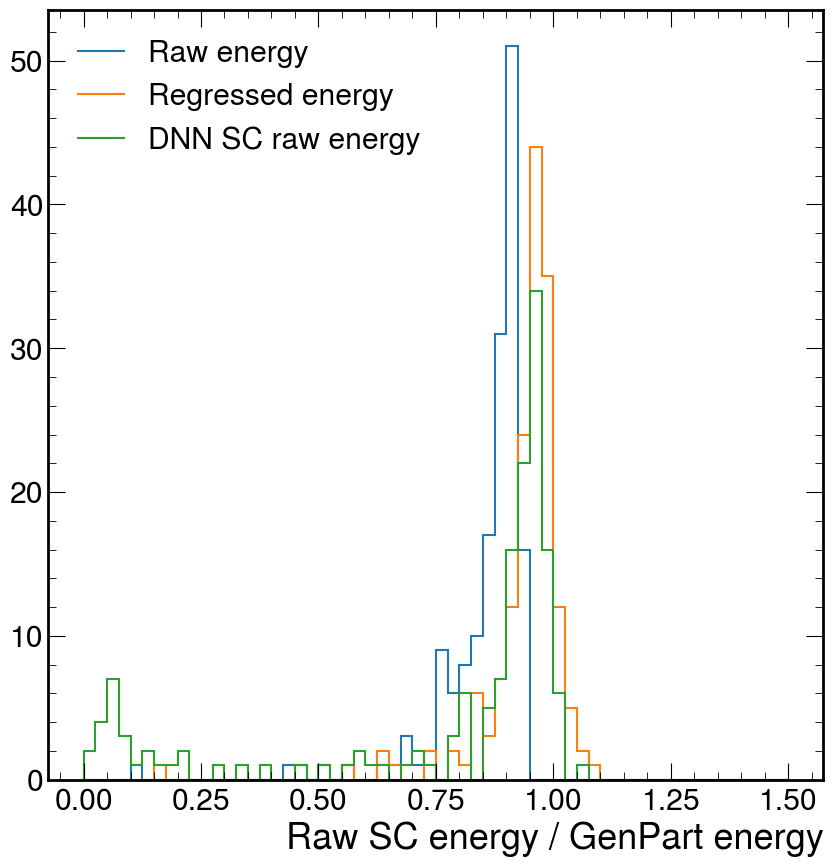

In [57]:
hep.histplot([h_mustache_SC_rawOverTrue, h_mustache_SC_regressedOverTrue, h_dnn_SC_rawOverTrue], yerr=False, label=["Raw energy", "Regressed energy", "DNN SC raw energy"])
plt.legend()

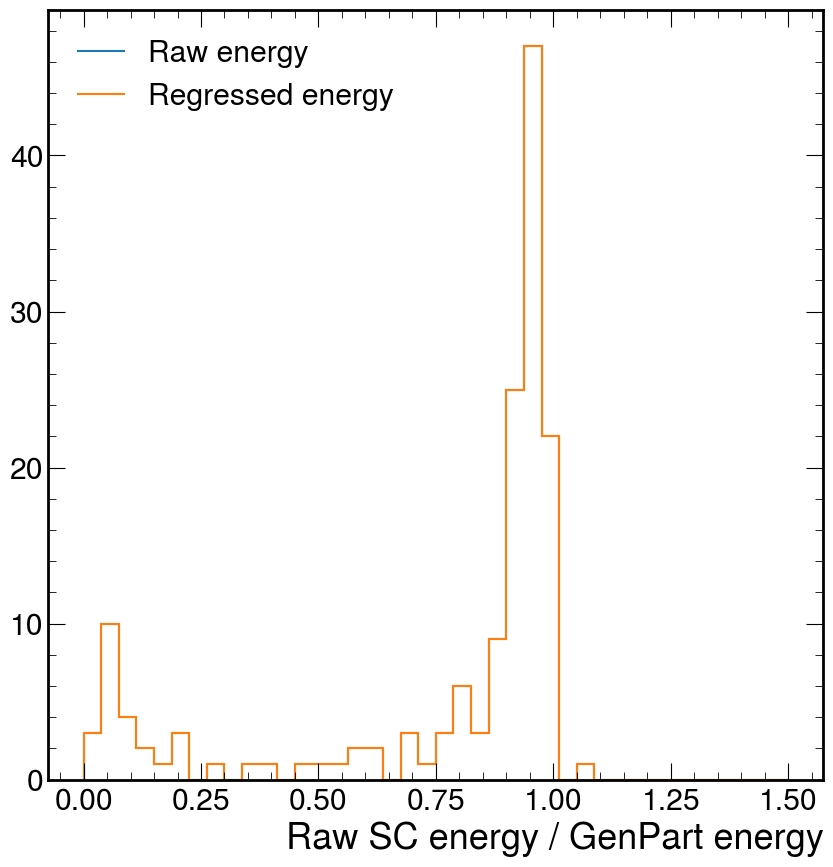

In [54]:
hep.histplot([h_dnn_SC_rawOverTrue, h_dnn_SC_regressedOverTrue], yerr=False, label=["Raw energy", "Regressed energy"])
plt.legend()

In [4]:
evt_baseline.genParticles

std::vector<reco::GenParticle>[reco::GenParticle(energy=15000.0,charge=0,eta=0.0,pdgId=990,isHardProcess=False),reco::GenParticle(energy=166.19723956428592,charge=-1,eta=2.7902884483337402,pdgId=11,isHardProcess=False),reco::GenParticle(energy=166.19723956428592,charge=1,eta=-2.7902884483337402,pdgId=-11,isHardProcess=False)]

In [6]:
evt_baseline.caloParticles

std::vector<CaloParticle>[CaloParticle(pdgId=-11,energy=166.19725036621094),CaloParticle(pdgId=11,energy=166.19725036621094)]

In [14]:
evt_baseline.oldHgcalSuperclusters

std::vector<reco::SuperCluster>[reco::SuperCluster(energy=161.16337314165392,rawEnergy=147.54135131835938,correctedEnergy=161.16337314165392,clustersSize=1,eta=2.7992810477566135,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x220a8dc0>),reco::SuperCluster(energy=153.59293570557833,rawEnergy=140.33721923828125,correctedEnergy=153.59293570557833,clustersSize=1,eta=-2.7845738102750714,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x220a8ee8>)]

In [7]:
evt_baseline.hgcalPfClusters

std::vector<reco::PFCluster>[reco::PFCluster(energy=149.46971806138754,correctedEnergy=149.46971806138754,eta=2.7992600285408376,layer=13,depth=0.0,pt=18.124859874450703,algo=5,caloID=CaloID: 1024,seed=DetId(det=HGCalEE,subdetId=0)),reco::PFCluster(energy=140.33721908461303,correctedEnergy=140.33721908461303,eta=-2.7845738102750714,layer=13,depth=0.0,pt=17.267310169262053,algo=5,caloID=CaloID: 1024,seed=DetId(det=HGCalEE,subdetId=0))]

In [12]:
evt_baseline.trackstersCLUE3DEM[0]

ticl::Trackster(raw_energy=141.04624938964844,regressed_energy=149.1729278564453)

In [11]:
evt_new.ticlEgammaSuperClusters

std::vector<reco::SuperCluster>[reco::SuperCluster(energy=141.04624938964844,rawEnergy=149.1729278564453,correctedEnergy=149.1729278564453,clustersSize=1,eta=-2.7831199098648387,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x322de670>),reco::SuperCluster(energy=148.03945922851562,rawEnergy=159.62240600585938,correctedEnergy=159.62240600585938,clustersSize=1,eta=2.7978599314892594,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x322de798>)]

In [13]:
evt_new.trackstersCLUE3DEM

std::vector<ticl::Trackster>[ticl::Trackster(raw_energy=141.04624938964844,regressed_energy=149.1729278564453),ticl::Trackster(raw_energy=148.03945922851562,regressed_energy=159.62240600585938)]

In [25]:
# while True:
#     next(events_baseline_iter)
#     #next(events_new_iter)
#     #evt.getByLabel("genParticles", genparts_h)
#     genparts = evt_baseline.get("vector<reco::GenParticle>", "genParticles")
#     if genparts[1].eta() > 1.6 and genparts[1].eta() < 2.8:
#         evt_new.object().to(evt_baseline.object().id())
#         if evt_new.ticlEgammaSuperClusters.size() > 0:
#             break

In [27]:
evt_baseline.oldHgcalSuperclusters[0].phiWidth()

0.005269800778478384

In [28]:
evt_new.ticlEgammaSuperClusters[2]

reco::SuperCluster(energy=172.51873779296875,rawEnergy=183.9346160888672,correctedEnergy=172.51873779296875,clustersSize=1,eta=2.2839144363339106,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x392c0620>)

In [29]:
list(evt_new.ticlEgammaSuperClusters[2].clusters())[0]#.get().hitsAndFractions()

reco::CaloCluster(energy=183.9346160888672,correctedEnergy=183.9346160888672,eta=2.2839144363339106,algo=5,caloID=CaloID: 1024,seed=DetId(det=HGCalEE,subdetId=0)

In [30]:
evt_baseline.electronSeeds

std::vector<reco::ElectronSeed>[ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=186.3620520702587,CaloClusterEta=2.2843319397621134),ElectronSeed(CaloDriven

In [31]:
evt_new.electronSeeds

std::vector<reco::ElectronSeed>[ElectronSeed(CaloDriven,charge=1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSeed(CaloDriven,charge=-1,CaloClusterEnergy=168.45266723632812,CaloClusterEta=-2.3093475126443925),ElectronSee

In [10]:
evt_baseline.get("vector<reco::GsfTrack>","electronGsfTracks" )

std::vector<reco::GsfTrack>[reco::GsfTrack(etaMode=-2.496912847005952,ptMode=10.612227166083121,qoverpMode=0.015413225981225324,outerEta=-2.49689123525632,outerPt=6.474755515014397,seedDirection=1),reco::GsfTrack(etaMode=2.496627919935485,ptMode=11.274840500713871,qoverpMode=-0.0145114814889851,outerEta=2.4963226662276305,outerPt=2.946369320300965,seedDirection=1)]

In [11]:
evt_new.get("vector<reco::GsfTrack>","electronGsfTracks" )

std::vector<reco::GsfTrack>[reco::GsfTrack(etaMode=-2.496912847005952,ptMode=10.612227166083121,qoverpMode=0.015413225981225324,outerEta=-2.49689123525632,outerPt=6.474755515014397,seedDirection=1),reco::GsfTrack(etaMode=2.496627919935485,ptMode=11.274840500713871,qoverpMode=-0.0145114814889851,outerEta=2.4963226662276305,outerPt=2.946369320300965,seedDirection=1)]

In [12]:
evt_baseline.printPfBlocks(filterOutNonEndcap=True)

In [13]:
list(evt_new.pfBlocks[67].elements())[-1].clusterRef().isAvailable()

True

In [14]:
evt_new.printPfBlocks(filterOutNonEndcap=True)

In [15]:
evt_new.get("vector<reco::GsfTrack>","electronGsfTracks" )[0].__dir__()

['__lifeline',
 '__module__',
 '__doc__',
 '__assign__',
 '__init__',
 'chargeMode',
 'covarianceMode',
 'errorMode',
 'etaMode',
 'etaModeError',
 'gsfExtra',
 'lambdaMode',
 'lambdaModeError',
 'momentumMode',
 'pMode',
 'parameterMode',
 'parametersMode',
 'phiMode',
 'phiModeError',
 'ptMode',
 'ptModeError',
 'pxMode',
 'pyMode',
 'pzMode',
 'qoverpMode',
 'qoverpModeError',
 'setGsfExtra',
 'setMode',
 'thetaMode',
 'thetaModeError',
 'dimensionMode',
 'covarianceSizeMode',
 '__repr__',
 'extra',
 'fillInner',
 'fillOuter',
 'found',
 'innerDetId',
 'innerMomentum',
 'innerOk',
 'innerPosition',
 'innerStateCovariance',
 'lost',
 'outerDetId',
 'outerEta',
 'outerMomentum',
 'outerOk',
 'outerP',
 'outerPhi',
 'outerPosition',
 'outerPt',
 'outerPx',
 'outerPy',
 'outerPz',
 'outerRadius',
 'outerStateCovariance',
 'outerTheta',
 'outerX',
 'outerY',
 'outerZ',
 'recHit',
 'recHits',
 'recHitsBegin',
 'recHitsEnd',
 'recHitsSize',
 'residuals',
 'seedDirection',
 'seedRef',
 'set

In [16]:
evt_baseline.get("vector<reco::ElectronSeed>","electronMergedSeeds" )
evt_baseline.get("vector<reco::GsfTrack>","electronGsfTracks" )

std::vector<reco::GsfTrack>[reco::GsfTrack(etaMode=-2.496912847005952,ptMode=10.612227166083121,qoverpMode=0.015413225981225324,outerEta=-2.49689123525632,outerPt=6.474755515014397,seedDirection=1),reco::GsfTrack(etaMode=2.496627919935485,ptMode=11.274840500713871,qoverpMode=-0.0145114814889851,outerEta=2.4963226662276305,outerPt=2.946369320300965,seedDirection=1)]